<a href="https://colab.research.google.com/github/KothaiKumar/rnn-stock-price-prediction/blob/main/EX5_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential

In [2]:
dataset_train = pd.read_csv('trainset.csv')
dataset_train.columns
dataset_train.head()
train_set = dataset_train.iloc[:,1:2].values
type(train_set)
train_set.shape

(1259, 1)

In [3]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)
training_set_scaled.shape

(1259, 1)

In [4]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))

In [5]:
X_train.shape
length = 60
n_features = 1

In [6]:
model = Sequential()
model.add(layers.SimpleRNN(150,input_shape=(length,n_features)))
model.add(layers.Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam', loss='mse')

In [9]:
print("NAME: KOTHAI K  \nREGISTER NUMBER: 212222240051 \n        ")
model.summary()

NAME: KOTHAI K  
REGISTER NUMBER: 212222240051 
        


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 150)                 │          22,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,951 (89.65 KB)

 Trainable params: 22,951 (89.65 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.fit(X_train1,y_train,epochs=30, batch_size=15)

Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0237
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 7.4651e-04
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.7470e-04
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.7939e-04
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.8661e-04
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 4.7328e-04
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.7401e-04
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.6849e-04
Epoch 9/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.3467e-04
Epoch 10/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.6120e-04
Epoch 11/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 2.8517e-04
Epoch 12/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.3936e-04
Epoch 13/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.9411e-04
Epoch 14/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.6841e-04
Epoch 15/30
80/80 ━

In [11]:
dataset_test = pd.read_csv('testset.csv')
test_set = dataset_test.iloc[:,1:2].values
test_set.shape
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [12]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [13]:
X_test.shape

(1324, 60, 1)

In [15]:
predicted_stock_price_scaled = model.predict(X_test) #This line was missing
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


NAME:Kothai K 
REGISTER NUMBER: 212222240051
 


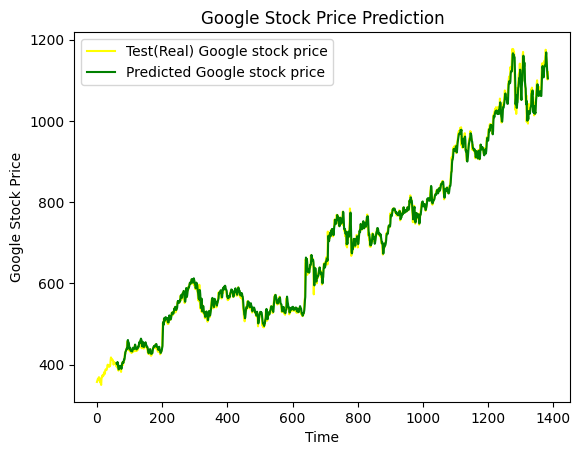

In [16]:
print("NAME:Kothai K \nREGISTER NUMBER: 212222240051\n ")
plt.plot(np.arange(0,1384),inputs, color='yellow', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='green', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()